In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/train/"
val_path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/test/"

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten
from keras.models import Sequential

In [4]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

2022-05-06 23:43:28.604843: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-06 23:43:28.669164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:43:28.675109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:43:28.675386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
train_data_gen=ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  shear_range=0.3,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  rotation_range=15)
training_set=train_data_gen.flow_from_directory(directory=train_path,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                batch_size=16,
                                                shuffle=True)

Found 1726 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [7]:
test_data_gen=ImageDataGenerator(rescale=1./255)
testing_set=test_data_gen.flow_from_directory(directory=val_path,
                                              target_size=(224,224),
                                             shuffle=False,
                                             batch_size=16,
                                             class_mode='binary')
                                         

Found 433 images belonging to 2 classes.


In [8]:
testing_set.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
import glob
import matplotlib.image as img
path_covid=list(glob.glob(val_path+"COVID19/"+"/*"))
path_normal=list(glob.glob(val_path+"NORMAL/"+"/*"))

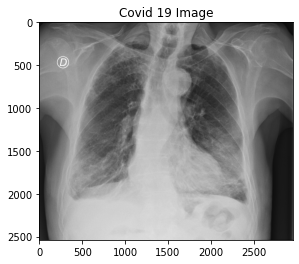

In [10]:
plt.title("Covid 19 Image")
covid_image_sample=img.imread(path_covid[0])
plt.imshow(covid_image_sample)

AxesImage(54,36;334.8x217.44)


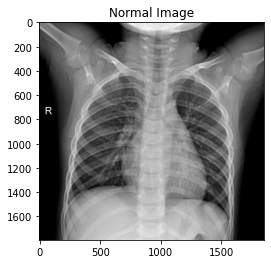

In [11]:
plt.title("Normal Image")
normal_image_sample=img.imread(path_normal[0])
print(plt.imshow(normal_image_sample))

In [12]:
model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

2022-05-06 23:43:30.769078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:43:30.769413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:43:30.769624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:43:30.769982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:43:30.770199: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [13]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

In [14]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

In [15]:
model.add(Flatten())
# model.add(Dropout(0.1))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint('final_model.h5',
                            monitor='val_loss',
                            mode='min',
                          save_best_only=True)

earlystopping=EarlyStopping(monitor='val_loss',
                            min_delta=0.001,
                            patience=3,
                           restore_best_weights=True)

# reduce_lr=ReduceLROnPlateau(monitor='val_loss',
#                            factor=0.1,
#                            patience=3,
#                            verbose=1,
#                            min_delta=0.001)

callback=[checkpoint,earlystopping]

In [17]:
from tensorflow.keras.optimizers import Adam
# opt = SGD(lr=0.001)
# opt = Adam(lr=0.003, beta_1=0.9, beta_2=0.999,
#                      epsilon=0.1, decay=0.0)
opt=Adam(lr=0.0001)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=['accuracy'])
# model.compile(loss = "binary_crossentropy",
#               optimizer = RMSprop(learning_rate=0.0001),
#               metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        3

In [19]:
hist=model.fit(training_set,
                epochs= 100,
                validation_data= testing_set,
                callbacks=callback) 

Epoch 1/100


2022-05-06 23:43:34.947561: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8202
2022-05-06 23:43:35.979912: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-06 23:43:35.979938: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-06 23:43:36.093011: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 918.72MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memo

108/108 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8007

2022-05-06 23:44:24.381877: W tensorflow/core/common_runtime/bfc_allocator.cc:343] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


108/108 [==============================] - 53s 443ms/step - loss: 0.4393 - accuracy: 0.8007 - val_loss: 0.4831 - val_accuracy: 0.8499
Epoch 2/100
108/108 [==============================] - 46s 426ms/step - loss: 0.3262 - accuracy: 0.8714 - val_loss: 0.3820 - val_accuracy: 0.9145
Epoch 3/100
108/108 [==============================] - 49s 450ms/step - loss: 0.2827 - accuracy: 0.8917 - val_loss: 0.2836 - val_accuracy: 0.9538
Epoch 4/100
108/108 [==============================] - 47s 437ms/step - loss: 0.2623 - accuracy: 0.9050 - val_loss: 0.3246 - val_accuracy: 0.9538
Epoch 5/100
108/108 [==============================] - 51s 469ms/step - loss: 0.2694 - accuracy: 0.9027 - val_loss: 0.2649 - val_accuracy: 0.9376
Epoch 6/100
108/108 [==============================] - 50s 460ms/step - loss: 0.2537 - accuracy: 0.9073 - val_loss: 0.2776 - val_accuracy: 0.9630
Epoch 7/100
108/108 [==============================] - 52s 485ms/step - loss: 0.2578 - accuracy: 0.9119 - val_loss: 0.1967 - val_accurac

In [20]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
h = hist.history
# h

In [22]:
epochs=range(1,len(h['accuracy'])+1)
epochs

range(1, 20)

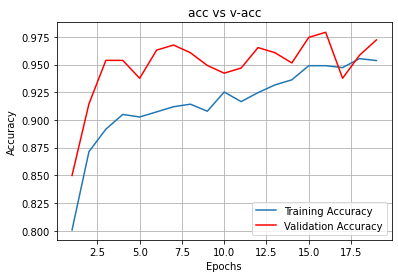

In [23]:
epochs=range(1,len(h['accuracy'])+1)
plt.plot(epochs,h['accuracy'],label="Training Accuracy")
plt.plot(epochs,h['val_accuracy'], c = "red",label="Validation Accuracy")
plt.title("acc vs v-acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

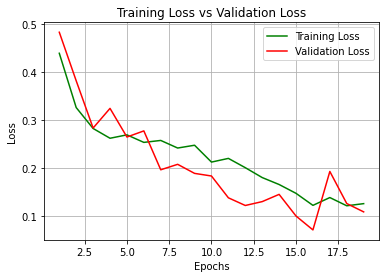

In [24]:
plt.plot(epochs,h['loss'],c='green',label="Training Loss")
plt.plot(epochs,h['val_loss'],c='red',label="Validation Loss")
plt.title("Training Loss vs Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
model.evaluate_generator(training_set)

[0.12718136608600616, 0.9536500573158264]

In [26]:
model.evaluate_generator(testing_set)

[0.07141951471567154, 0.9792147874832153]

### Image Test

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
model=load_model('final_model.h5')

In [28]:
#   Input : Takes in image path as input 
#   Output : Gives out Pre-Processed image
def get_img_array(img_path):
    path = img_path
    img = image.load_img(path, target_size=(224,224,3))
    img = image.img_to_array(img)/255
    img = np.expand_dims(img , axis= 0 )
    return img

In [29]:
def Final_Result(array_value):
    if array_value < 0.50:
        return "Covid"
    else:
        return "Normal"

In [30]:
class_type = {0:'Covid',  1 : 'Normal'}

In [31]:
path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/train/NORMAL/NORMAL(100).jpg"

In [32]:
img = get_img_array(path)

In [33]:
test=np.argmax(model.predict(img))
test

0

In [34]:
res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
# print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

The given X-Ray image is of type = Covid
The chances of image being Covid is : 99.96517896652222 percent


In [35]:
path="/home/bibek/Downloads/Small_Size_Data/dataset/normal/NORMAL2-IM-1277-0001-0001.jpeg"
img = get_img_array(path)
model.predict(img)

array([[0.99958104]], dtype=float32)

In [36]:
path="/home/bibek/Downloads/Small_Size_Data/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg"
img = get_img_array(path)
x=model.predict(img)
print(x)
print(Final_Result(x))
print(100-model.predict(img)[0][0]*100)

[[0.14836256]]
Covid
85.16374379396439


In [37]:
path="/home/bibek/Downloads/Small_Size_Data/dataset/normal/NORMAL2-IM-1090-0001.jpeg"
img = get_img_array(path)
x=model.predict(img)
print(x)
print(Final_Result(x))
print(model.predict(img)[0][0]*100)

[[0.99996877]]
Normal
99.99687671661377
